In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
df = pd.DataFrame({'Name':['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon'],
                   'Type': ['Grass', 'Grass', 'Grass', 'Fire', 'Fire'],
                   'Attack': [45, 60, 80, 39, 58],
                   'HP':[49, 62, 82, 52, 64],
                   'Defense': [49, 63, 83, 43, 58],
                   'Speed': [45, 60, 80, 65, 80],
                   'Generation': [1, 1, 1, 1, 1]})
df.describe() # проигноирует категориальные признаки (имена, типы)
df.describe(exclude='number')

,Name,Type
count,5,5
unique,5,2
top,Bulbasaur,Grass
freq,1,3


Отбор признаков

In [9]:
import seaborn as sns
ansur_df = pd.read_csv('/content/ansur_df_1.csv')
ansur_df.head(3)

,Gender,weight_kg,stature_m,body_height
0,Male,81.5,1.776,69.92
1,Male,72.6,1.702,67.01
2,Male,92.9,1.735,68.31


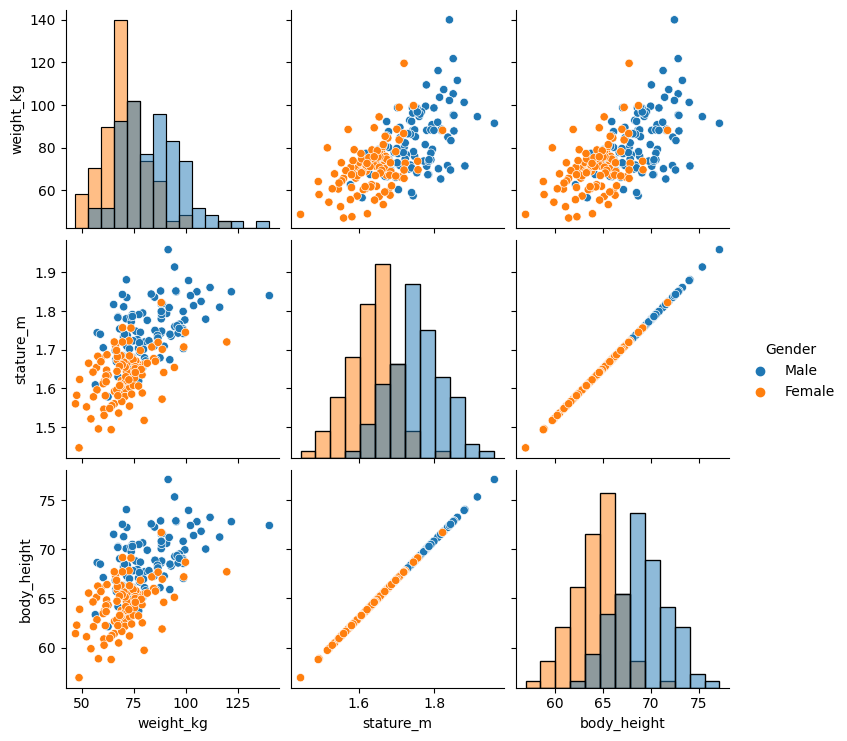

In [10]:
sns.pairplot(ansur_df, hue="Gender", diag_kind='hist') #построение парных графиков (диагональ - гистограмма), hue по полу, константу видит

t-SNE визуализация многомерных данных

In [ ]:
#удаляем нечисловые столбцы c ними не работает
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
df_numeric = df.drop(non_numeric, axis=1)
df_numeric.shape

from sklearn.manifold import TSNE
m = TSNE(learning_rate=50) #кол-во комбинаций чем больше тем авантюрнее алгоритм
tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4,:] #выход numpy array 2D
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="x", y="y", data=df)
plt.show()

sns.scatterplot(x="x", y="y", hue='BMI_class', data=df)
plt.show() # в горизонательном направлениии дисперсия объясняется весом

sns.scatterplot(x="x", y="y", hue='Height_class', data=df)
plt.show() # в вертикальном дисперсия объясняется ростом человека
# t-SNE помог определить важные факторы дисперсии в формах тела

Признаки с небольшой дисперсией

In [ ]:
#признаки с маленькой дисперсией очень похожи между наблюдениями
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1) #минимальный порог дисперсии
sel.fit(ansur_df)
mask = sel.get_support()
print(mask) #выход: [True, False, True]
reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape) # было 94 стало 93

buttock_df.boxplot() #помни о нормализации данных для сравнения дисперсии

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.005)
sel.fit(ansur_df / ansur_df.mean()) #нормализация дисперсии - деление на mean
mask = sel.get_support()
reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)

#пропущенные значения
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3
print(mask) #маска для каждого столбца True/False
reduced_df = pokemon_df.loc[:, mask]

Пропущенные значения

In [17]:
import numpy as np
pokemon_df = pd.DataFrame({'Name':['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon'],
                   'Type1': ['Grass', 'Grass', 'Grass', 'Fire', 'Fire'],
                   'Type2': ['Poison', 'Poison', 'Poison', np.NAN, np.NAN],
                   'Attack': [45, 60, 80, 39, 58],
                   'HP':[49, 62, 82, 52, 64],
                   'Defense': [49, 63, 83, 43, 58],
                   'Speed': [45, 60, 80, 65, 80],
                   'Generation': [1, 1, 1, 1, 1]})
pokemon_df.isna()

,Name,Type1,Type2,Attack,HP,Defense,Speed,Generation
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [18]:
pokemon_df.isna().sum()

Name          0
Type1         0
Type2         2
Attack        0
HP            0
Defense       0
Speed         0
Generation    0
dtype: int64

In [19]:
pokemon_df.isna().sum() / len(pokemon_df)

Name          0.0
Type1         0.0
Type2         0.4
Attack        0.0
HP            0.0
Defense       0.0
Speed         0.0
Generation    0.0
dtype: float64

In [20]:
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3
print(mask)

Name           True
Type1          True
Type2         False
Attack         True
HP             True
Defense        True
Speed          True
Generation     True
dtype: bool


In [21]:
reduced_df = pokemon_df.loc[:, mask]
reduced_df.head()

,Name,Type1,Attack,HP,Defense,Speed,Generation
0,Bulbasaur,Grass,45,49,49,45,1
1,Ivysaur,Grass,60,62,63,60,1
2,Venusaur,Grass,80,82,83,80,1
3,Charmander,Fire,39,52,43,65,1
4,Charmeleon,Fire,58,64,58,80,1


Попарная корреляция

In [22]:
ansur_df.corr()

,weight_kg,stature_m,body_height
weight_kg,1.000000,0.610908,0.610888
stature_m,0.610908,1.000000,1.000000
body_height,0.610888,1.000000,1.000000


<Axes: >

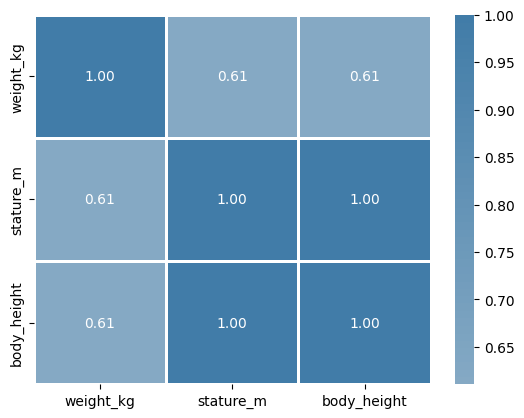

In [23]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True) #передаем пользовательскую световую палитру
sns.heatmap(ansur_df.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f") # красиво раскашенная таблциа

<Axes: >

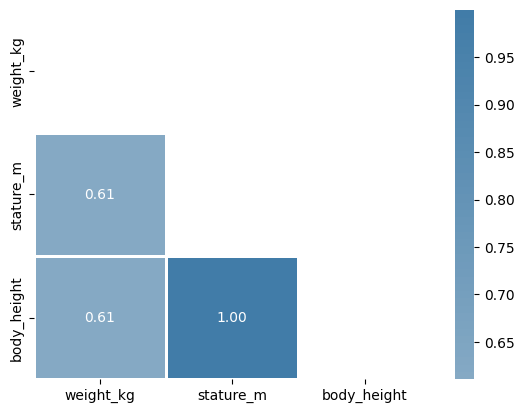

In [24]:
corr = ansur_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) #создаем матрицу True и верх - True, диагональ и низ False
sns.heatmap(ansur_df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f") # отображены только низ

Удаление сильно коррелированных признаков

In [25]:
corr_df = ansur_df.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask) #маска для метода DataFrame которая заменяет True на NaN
tri_df #надо чтобы не удалить оба признака

,weight_kg,stature_m,body_height
weight_kg,NaN,NaN,NaN
stature_m,0.610908,NaN,NaN
body_height,0.610888,1.0,NaN


In [27]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop) #столбцы для удаления
reduced_df = ansur_df.drop(to_drop, axis=1)

['stature_m']


RFE - рекурсивное устранение признаков

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
X_test_std = scaler.transform(X_test)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test, y_pred))
print(lr.coef_) #array([[-3. , 0.14, 7.46, 1.22, 0.87]])

print(dict(zip(X.columns, abs(lr.coef_[0])))) #{'chestdepth': 3.0, 'handlength': 0.14, 'neckcircumference': 7.46, 'shoulderlength': 1.22, 'earlength': 0.87}
X.drop('handlength', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(scaler.fit_transform(X_train), y_train)
print(accuracy_score(y_test, lr.predict(scaler.transform(X_test))))

from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)
rfe.fit(X_train_std, y_train) #остановится когда найдет те 2 признака

X.columns[rfe.support_] #значение True/False то что осталось
print(dict(zip(X.columns, rfe.ranking_))) #{'chestdepth': 1, 'handlength': 4, 'neckcircumference': 1, 'shoulderlength': 2, 'earlength': 3}, 4 - рано ушел, 1 - остался до конца
#оценка производительности новой модели
print(accuracy_score(y_test, rfe.predict(X_test_std)))

Отбор признаков в случайном лесе

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(accuracy_score(y_test, rf.predict(X_test)))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.feature_importances_) # чем больше тем лучше и суммируется к единице

mask = rf.feature_importances_> 0.1
print(mask)

X_reduced = X.loc[:, mask]
print(X_reduced.columns)

#RFE со случайным лесом
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, verbose=1)
rfe.fit(X_train,y_train)
print(accuracy_score(y_test, rfe.predict(X_test))) #точность не упала
#rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, step=10 (кол-во отбрасываемых признаков за шаг), verbose=1)
#print(X.columns[rfe.support_])

In [ ]:
# линейная регрессия и регуляризация
from sklearn.linear_model import LinearRegression
lr = LinearRegression(alpha=0.05)
lr.fit(X_train, y_train)
print(lr.coef_)
print(la.score(X_test, y_test)) # считаем R2

In [ ]:
#отбор признаков линейной регрессии с L1
from sklearn.linear_model import LassoCV
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(lcv.alpha_) #поиск оптимального alpha
mask = lcv.coef_!= 0
reduced_X = X.loc[:, mask] #отбор признаков
lcv.score(X_test, y_test)

#случайные леса
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=66, step=5, verbose=1)
rfe_rf.fit(X_train, y_train)
rf_mask = rfe_rf.support_ # важность признаков

#градиентный boosting
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=66, step=5, verbose=1)
rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

import numpy as np
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0) # голосование
print(votes)

PCA

<Axes: xlabel='headlength', ylabel='footlength'>

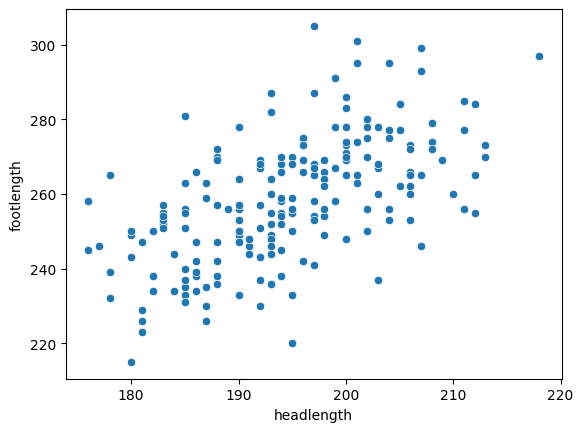

In [32]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/ansur_df_2.csv')
sns.scatterplot(data=df, x='headlength', y='footlength')

<Axes: xlabel='headlength', ylabel='footlength'>

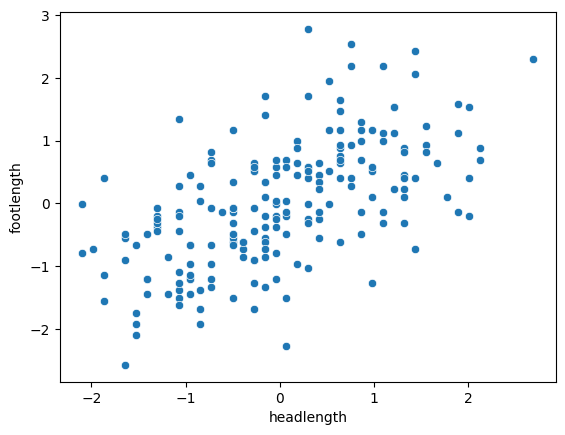

In [37]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[['footlength', 'headlength']]), columns = ['footlength', 'headlength'])
sns.scatterplot(data=df_std, x='headlength', y='footlength')

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
print(pca.fit_transform(df_std)[:5]) # новые координаты
print(pca.explained_variance_ratio_) #.cumsum()

[[ 1.55584298 -0.31636613]
 [ 0.73199573 -0.33426887]
 [ 1.10720268 -0.12025082]
 [ 0.73915683 -0.00472996]
 [ 2.17729289  1.75578391]]
[0.79630685 0.20369315]


<Axes: xlabel='Principal component 1', ylabel='Principal component 2'>

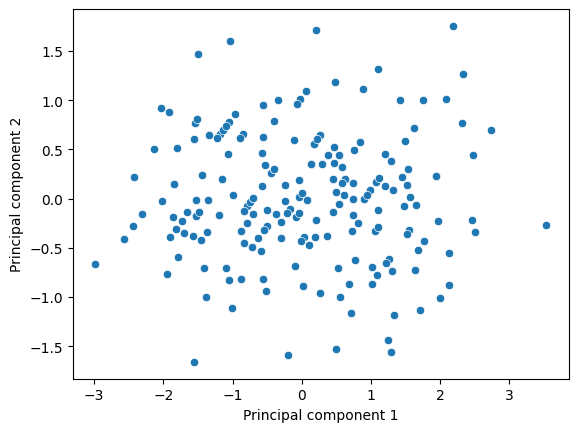

In [40]:
df_std_pca = pd.DataFrame(pca.fit_transform(df_std), columns = ['Principal component 1', 'Principal component 2'])
sns.scatterplot(data=df_std_pca, x='Principal component 1', y='Principal component 2')

In [41]:
#понимание компонент
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA())])
pc = pipe.fit_transform(ansur_df) #2D массив
print(pc[:,:2])

ansur_categories['PC 1'] = pc[:,0]
ansur_categories['PC 2'] = pc[:,1]
sns.scatterplot(data=ansur_categories, x='PC 1', y='PC 2', hue='Height_class', alpha=0.4)
sns.scatterplot(data=ansur_categories, x='PC 1', y='PC 2', hue='Gender', alpha=0.4)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=3)), ('classifier', RandomForestClassifier())])
print(pipe['reducer']) #выход PCA(n_components=3)

pipe.fit(X_train, y_train)
pipe['reducer'].explained_variance_ratio_ #!обрати внимание на обращение
pipe['reducer'].explained_variance_ratio_.sum()
print(pipe.score(X_test, y_test))

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.9))]) #указываем какую долю хотим сохранить
pipe.fit(poke_df) # через n_components
print(len(pipe['reducer'].components_))

pipe.fit(poke_df) #график для понимания кол-ва компонент
var = pipe['reducer'].explained_variance_ratio_plt.plot(var)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

Обратно из копонент в признаки

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=290))])
pipe.fit(X_train)
pc = pipe.fit_transform(X_test)
print(pc.shape)

pc = pipe.transform(X_test)
print(pc.shape)

X_rebuilt = pipe.inverse_transform(pc)
print(X_rebuilt.shape)
img_plotter(X_rebuilt)